<a href="https://colab.research.google.com/github/Danjstr/AIM-5001/blob/master/D_Strauss_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIM 5001 Final Project

**Introduction**

Nasa has been observing space for the last several decades using ever more sophisticated space telescopes. They have used these telescopes to determine and confirm that other planets exist around other stars in our galaxy and beyond. One of these Space telescopes The Keplar Space Telescope has been instrumental in identifying many objects of interest outside our solar system. Many of these objects of Intrest have been confirmed planets by Nasa. This data can be hard to interoperate and with new planets popping up every so often it is hard to generate a real understanding of the process involved in identifying planets. Today we usually get a NASA press release on page 37 of some odd journal claiming the discovery of a new planet. There is little in the way of public knowledge regarding the process of determining if an identified object is a planet and what the limits of the current technology are. As such we will be making comparisons between the Mass of the confirmed planets Table with our Solar system. As well as Comparing the orbital periods of the Confirmed planets table and the Kepler objects of interest table.

**Research Questions**

Question 1: I will be determining the average mass of Kepler confirmed planets, as well as the mass of the smallest Keplar, confirmed planet. Then comparing it to the mass of the planets in our solar system to determine if the Keplar space telescope is biased to larger planets that are easier to see.

Question 2: I will be Comparing the orbital periods of the Confirmed planets table and the Kepler objects of interest table to gain better insight into the data.


**Data to be Used**

The data used will come primarily from two different sources. The first "Kepler Objects of Interest (KOI)" Table and the second the "Confirmed Planets (Exoplanet)" Table.


The first Table "Kepler Objects of Interest (KOI)" will be provided as a csv. Information on this table can be found via the provided Kaggle link.

https://www.kaggle.com/nasa/kepler-exoplanet-search-results?select=cumulative.csv


The second Table the "Confirmed Planets (Exoplanet)" Table will be provided via the API using the instructions on the bellow webpage. 

https://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html


Any data from our solar system used for comparison will be entered manually into the code as this is the easiest method to use when dealing with so few data points. Our solar system data will be based on relevant data from the following webpage. 

http://www.astromax.org/planets.htm



Approach: For research question 1: I will also be determining the mean and min of the mass of all planets discovered by Kepler to determine if the Telescope has trouble locating smaller objects and planets.  I will be using a box plot and histogram to determine the spread of the mass of the planets. This will be compared with the mass of objects in our solar system to determine the lower limit on the mass of planets Kepler can identify.

We begin by importing All of our necessary libraries.

In [65]:

#import pandas as pd
import pandas as pd
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
#import seaborn as sns
import seaborn as sns
#import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
#import train test split from sklearn
from sklearn.model_selection import train_test_split
#import metrics from sklearn
from sklearn import metrics
#import cross_val_score from sklearn
from sklearn.model_selection import cross_val_score
#import numpy as np
import numpy as np



Create a dictionary for all the planets in our solar system. We will be including the Moon and Pluto even though they technically don't count just for the extra data points. Then we will turn that dictionary into a DataFrame.

In [66]:
#Create a dictionary for all the mass of the planets in our solar system
plan_dic={'Mercury':0.055274, 'Venus':0.815005, 'Earth':1,'Moon':0.0123,'Mars':0.107447,'Jupiter':317.833,'Saturn':95.159,'Uranus':14.5,'Neptune':17.204,'Pluto':0.0025}

In [67]:
#Print the dictionary
print(plan_dic)

{'Mercury': 0.055274, 'Venus': 0.815005, 'Earth': 1, 'Moon': 0.0123, 'Mars': 0.107447, 'Jupiter': 317.833, 'Saturn': 95.159, 'Uranus': 14.5, 'Neptune': 17.204, 'Pluto': 0.0025}


In [68]:
#Turn the dictionary into a dataframe
df = pd.DataFrame([plan_dic])


In [69]:
#Show the results
df

,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,0.055274,0.815005,1,0.0123,0.107447,317.833,95.159,14.5,17.204,0.0025


The rest of our data and the confirmed planet data is in Jupiter mass units. This means all our data below counts with Jupiters mass = 1. The table we created above has our solar system in earth mass units in other words earth = 1. This means we will need to convert our table and divide all it's values by 317.833 to make sure we are working in the same units as our confirmed planet table. This is to ensure there are no errors during later analysis.

In [70]:
#Convert to Jupiter Mass Units
df=df/317.833
df

,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,0.000174,0.002564,0.003146,0.000039,0.000338,1.0,0.299399,0.045621,0.054129,0.000008


Unstack the data so that we have all our planets as a column next to our mass data. 
We rename the columns and give them an appropriate designation, Planets, and Mass respectively.
Finally, we drop the column = 'level_1' as it is unneeded. Group the data by mass so that we can see the planets from least massive to most massive. Then reset the index as the group function will turn the grouped mass data into the index and we need it as a column.

In [71]:
#Unstack the dataframe so that we have a column each for our planets and mass respectively
df=pd.DataFrame(df.unstack().reset_index())

In [72]:
#RRename the Mass column
df = df.rename(columns={0: "mass"})
# Rename the Planet column
df = df.rename(columns={"level_0": "Planets"})
#Drop the column 'level_1' it is not necessary
df=df.drop(columns=['level_1'])
#Show the result
df

,Planets,mass
0,Mercury,0.000174
1,Venus,0.002564
2,Earth,0.003146
3,Moon,0.000039
4,Mars,0.000338
5,Jupiter,1.000000
6,Saturn,0.299399
7,Uranus,0.045621
8,Neptune,0.054129
9,Pluto,0.000008


In [73]:
#Group the data by mass so that we can see the planets from least massive to most massive
df0=df.groupby('mass').first()
df0

,Planets
mass,
0.000008,Pluto
0.000039,Moon
0.000174,Mercury
0.000338,Mars
0.002564,Venus
0.003146,Earth
0.045621,Uranus
0.054129,Neptune
0.299399,Saturn


In [74]:
df=df0.reset_index()
df

,mass,Planets
0,0.000008,Pluto
1,0.000039,Moon
2,0.000174,Mercury
3,0.000338,Mars
4,0.002564,Venus
5,0.003146,Earth
6,0.045621,Uranus
7,0.054129,Neptune
8,0.299399,Saturn
9,1.000000,Jupiter


The exoplanet archive is unbelievably simple to use. There is no API Key required for use. A user simply makes a request to the API using the appropriate query. All Nasa data is owned by the public I believe this is the reason for the absence of an API key.

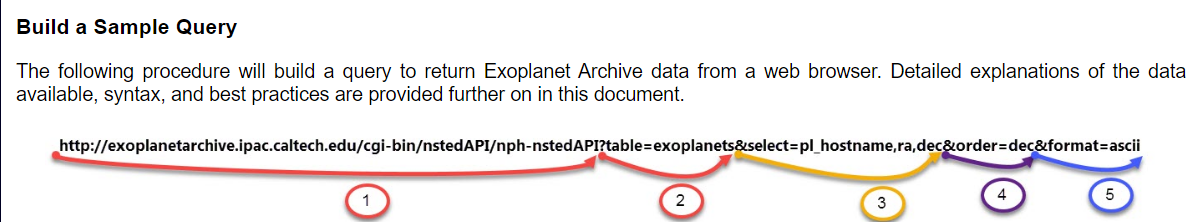

In [75]:
#Improt our confirmed planets from the Caltech API.
conf_plan = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets&select=pl_name,pl_bmassj,pl_orbper"



Our API request allows us to pull only the data we need from Caltechs archive of NASA data. For this scenario, we are pulling the planet's name for our personal use. It will help us keep things organized. The planet's mass for our first research question and the planet's orbital periods in earth days for our second research question. We will then convert all our data into a Dataframe.

In [76]:
#Read our confirmed planets into a pandas dataframe
df2 = pd.read_csv(conf_plan)
#Show the results
df2.head()

,pl_name,pl_bmassj,pl_orbper
0,HD 177830 b,1.690,410.100010
1,HD 177830 c,0.150,110.900000
2,HD 178911 B b,8.030,71.484000
3,HD 179079 b,0.081,14.479000
4,HD 179949 b,0.916,3.092514


We need a statitistical overview of the data. So we will be generating some summary statistics, including the shape, data type, description, and information.

In [77]:
#Show the shape of the data
df2.shape

(4324, 3)

In [78]:
#Show the type of the data
df2.dtypes

pl_name       object
pl_bmassj    float64
pl_orbper    float64
dtype: object

In [79]:
#Show the description of the data
df2.describe()

,pl_bmassj,pl_orbper
count,1806.000000,4.180000e+03
mean,2.404317,2.060520e+03
std,4.371368,1.129482e+05
min,0.000060,9.070629e-02
25%,0.067413,4.465547e+00
50%,0.790000,1.176103e+01
75%,2.430000,4.169784e+01
max,55.590000,7.300000e+06


In [80]:
#Show the information of the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pl_name    4324 non-null   object 
 1   pl_bmassj  1806 non-null   float64
 2   pl_orbper  4180 non-null   float64
dtypes: float64(2), object(1)
memory usage: 101.5+ KB


As we can see from the information above the minimum mass recorded is 0.000060. This answers one part of our research question. This is relatively comparable to the 0.000039 mass of Earth's moon, at just 30% more massive. This means the Kepler space telescope can locate planets that are just 30% larger than Earth's moon.

We could speculate that the smaller planets that were located happened to be the ones that were closer to earth. This however is outside the scope of our analysis.

Another interesting thing to note from our summary statistics is that we are missing significant amounts of data from our pl_bmassj column and the pl_orber column.

We will need to do a Forward Fill to fill out our data appropriately. But we need to make sure the distribution of the data remains unchanged by our forword fill as this is important for our analysis. We shall be using a histogram for this purpose.

Text(0, 0.5, 'Number of Planets')

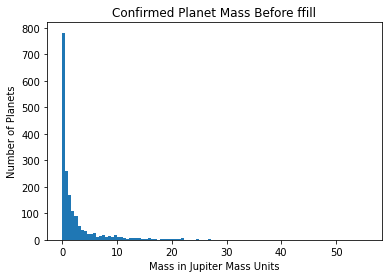

In [81]:
#Show a histogram of the mass of the confrmed planet's data
plt.hist(df2['pl_bmassj'],bins=100)
#Create a Title for the plot
plt.title('Confirmed Planet Mass Before ffill')
#Create the x_label
plt.xlabel('Mass in Jupiter Mass Units')
#Create the y_label
plt.ylabel('Number of Planets')


In [82]:
#Use Foreward fill to fill in our missing values
df2=df2.ffill(axis = 0)
#Show the result
df2

,pl_name,pl_bmassj,pl_orbper
0,HD 177830 b,1.69000,410.100010
1,HD 177830 c,0.15000,110.900000
2,HD 178911 B b,8.03000,71.484000
3,HD 179079 b,0.08100,14.479000
4,HD 179949 b,0.91600,3.092514
...,...,...,...
4319,HR 858 b,13.00000,3.585990
4320,HR 858 c,13.00000,5.972930
4321,HR 858 d,13.00000,11.230000
4322,K2-146 c,0.02358,4.004980


Now that we have done a forward fill we will need another histogram to confirm that the distribution of the data remains intact. As we can see larger planets tend to form a long tail of outliers compared to smaller less massive planets. There is certainly some amount of bias towards planets with masses between 1 and 10 Jupiter mass units. 

Text(0, 0.5, 'Number of Planets')

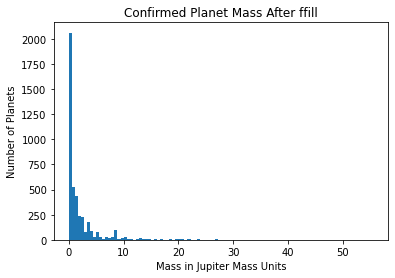

In [83]:
#Show a histogram of the mass of the confirmed planet's data again to confirm the spread of the data has remained intact.
plt.hist(df2['pl_bmassj'],bins=100)
#Create a title for the plot
plt.title('Confirmed Planet Mass After ffill')
#Create the x_label
plt.xlabel('Mass in Jupiter Mass Units')
#Create the y_label
plt.ylabel('Number of Planets')

This is the same histogram run on the data of our soalr system. It is less informative and less complete due to th limmit of the data we are working with. Still we can confirm the general distribution of the masses of our solar system. 

Text(0, 0.5, 'Number of Planets')

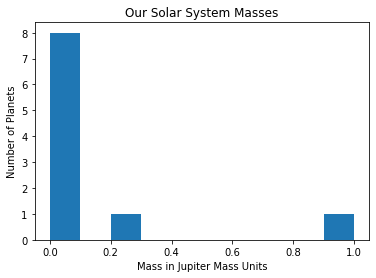

In [84]:
#Show a histogram of the mass of the planets from our solar system
plt.hist(df['mass'],bins=10)
#Create a Title for the plot
plt.title('Our Solar System Masses')
#Create the x_label
plt.xlabel('Mass in Jupiter Mass Units')
#Create the y_label
plt.ylabel('Number of Planets')

This swarm plot and boxplot show that our hypothesis is correct. Most of the planets are between 1 and 10 Jupiter masses. we should note that the planets in our solar system are significantly smaller than the large proportion of confirmed planets. This is an interesting quirk of the data that indicates that Kepler has found far fewer planets that are more than 10 times more massive than Jupiter when compared to the amount it has found that are smaller than 10 Jupiter mass units.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0, 'Confrimed Planets'), Text(0, 0, 'Our Solar System')]

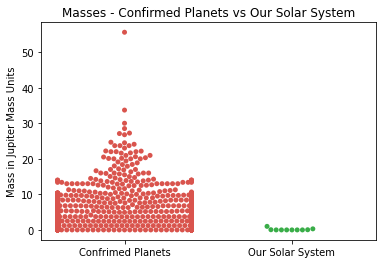

In [85]:
#Show a swarmplot of the mass of our solar system vs the mass of Kepler confirmed planets.
g=sns.swarmplot(
    data=[df2['pl_bmassj'], df['mass']],
    palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]])
#Create a title for the plot
plt.title('Masses - Confirmed Planets vs Our Solar System')
#Create the y_label
plt.ylabel('Mass in Jupiter Mass Units')
#Label the x_ticks
g.set_xticklabels(['Confrimed Planets','Our Solar System'])




[Text(0, 0, 'Confrimed Planets'), Text(0, 0, 'Our Solar System')]

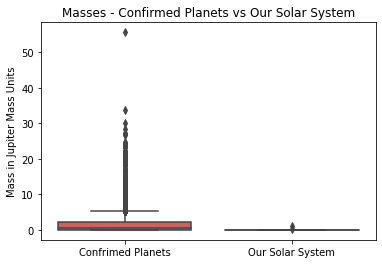

In [86]:
#Show a boxplot of the mass of our solar system vs the mass of Kepler confirmed planets.
g=sns.boxplot(
    data=[df2['pl_bmassj'], df['mass']],
    palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]])
#Create a Title for the plot
plt.title('Masses - Confirmed Planets vs Our Solar System')
#Create the y_label
plt.ylabel('Mass in Jupiter Mass Units')
#Label the x_ticks
g.set_xticklabels(['Confrimed Planets','Our Solar System'])


**Approach**

Approach: For research question 2:  I will be comparing the orbital period of the Kepler Confirmed Panets Table and the Kepler Objects of Intrest Table. For the feature we did not cover in class, I will use linear regressors from the sci-kit learn to help better predict the relationship between these variables. I will also be doing a train test split so that my linear regressor can be verified on a test sample of the data. 

We import our Keplar Objects of interest Table as a csv and read it into a dataframe. Then we gather the appropriate summary statistics for our data.

In [87]:
#Retrieve the Kepler Objects of Intrest data as a csv.
Obj_intrest = "https://raw.githubusercontent.com/Danjstr/AIM-5001/master/cumulative.csv"
#Read the data into a dataframe
df1 = pd.read_csv(Obj_intrest)
#Show the results
df1.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [88]:
#Show the information of the dataframe
df1.info

<bound method DataFrame.info of       rowid     kepid kepoi_name  ...         ra        dec koi_kepmag
0         1  10797460  K00752.01  ...  291.93423  48.141651     15.347
1         2  10797460  K00752.02  ...  291.93423  48.141651     15.347
2         3  10811496  K00753.01  ...  297.00482  48.134129     15.436
3         4  10848459  K00754.01  ...  285.53461  48.285210     15.597
4         5  10854555  K00755.01  ...  288.75488  48.226200     15.509
...     ...       ...        ...  ...        ...        ...        ...
9559   9560  10031643  K07984.01  ...  298.74921  46.973351     14.478
9560   9561  10090151  K07985.01  ...  297.18875  47.093819     14.082
9561   9562  10128825  K07986.01  ...  286.50937  47.163219     14.757
9562   9563  10147276  K07987.01  ...  294.16489  47.176281     15.385
9563   9564  10156110  K07989.01  ...  297.00977  47.121021     14.826

[9564 rows x 50 columns]>

In [89]:
#Show the data types of the dataframe
df1.dtypes

rowid                  int64
kepid                  int64
kepoi_name            object
kepler_name           object
koi_disposition       object
koi_pdisposition      object
koi_score            float64
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_teq_err1         float64
koi_teq_err2         float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2

We can see we have a lot of unnecessary columns that have no real value for our research question. We will need to drop them.

In [90]:
#Drop unnecessary columns
df3=df1.drop(columns=['koi_tce_delivname','koi_pdisposition','rowid', 'kepid','kepoi_name' ])

In [91]:
#Show the results
df3

,kepler_name,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,Kepler-227 b,CONFIRMED,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,Kepler-227 c,CONFIRMED,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,NaN,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,NaN,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,Kepler-664 b,CONFIRMED,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,NaN,FALSE POSITIVE,0.000,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,NaN,NaN,176.40,152.77,-77.60,8.4,1.0,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,NaN,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,NaN,NaN,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,NaN,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,NaN,NaN,1585.81,1537.86,-502.22,10.6,1.0,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,NaN,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,NaN,NaN,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [92]:
#Drop all columns except 'kepler_name','koi_disposition','koi_period'
df4=df3.drop(df3.columns.difference(['kepler_name','koi_disposition','koi_period']), 1, inplace=False)

We kept the name column for our own convenience. While Koi_disposition and koi_period are necessary for our analysis.

In [93]:
#Show the results
df4

,kepler_name,koi_disposition,koi_period
0,Kepler-227 b,CONFIRMED,9.488036
1,Kepler-227 c,CONFIRMED,54.418383
2,NaN,FALSE POSITIVE,19.899140
3,NaN,FALSE POSITIVE,1.736952
4,Kepler-664 b,CONFIRMED,2.525592
...,...,...,...
9559,NaN,FALSE POSITIVE,8.589871
9560,NaN,FALSE POSITIVE,0.527699
9561,NaN,CANDIDATE,1.739849
9562,NaN,FALSE POSITIVE,0.681402


Get the information on our newly modified dataframe.

In [94]:
#Show the information of the dataframe
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kepler_name      2294 non-null   object 
 1   koi_disposition  9564 non-null   object 
 2   koi_period       9564 non-null   float64
dtypes: float64(1), object(2)
memory usage: 224.3+ KB


Remove any confirmed planet data from our Kepler Object of Intrest Table. It is not necessary as we have the confirmed planet data in a separate table.

In [95]:
#Remove confirmed planet data from the dataframe
df5=df4[df4.koi_disposition != 'CONFIRMED']
#Show the results
df5

,kepler_name,koi_disposition,koi_period
2,NaN,FALSE POSITIVE,19.899140
3,NaN,FALSE POSITIVE,1.736952
8,NaN,FALSE POSITIVE,7.361790
14,NaN,FALSE POSITIVE,11.521446
15,NaN,FALSE POSITIVE,19.403938
...,...,...,...
9559,NaN,FALSE POSITIVE,8.589871
9560,NaN,FALSE POSITIVE,0.527699
9561,NaN,CANDIDATE,1.739849
9562,NaN,FALSE POSITIVE,0.681402


We have removed the confirmed planets from the objects of interest. This means we can also remove our last two columns so we only have our orbital data for non-confirmed planets.

In [96]:
#Drop the 'kepler_name','koi_disposition' tables as we now have orbital data for our non_confirmed planets
df5=df5.drop(columns=['kepler_name','koi_disposition'])
#Show the results
df5

,koi_period
2,19.899140
3,1.736952
8,7.361790
14,11.521446
15,19.403938
...,...
9559,8.589871
9560,0.527699
9561,1.739849
9562,0.681402


Reset the index just so we can keep things clean.

In [97]:
#Reset the index
df5=df5.reset_index(drop=True)
#Show the results
df5

,koi_period
0,19.899140
1,1.736952
2,7.361790
3,11.521446
4,19.403938
...,...
7266,8.589871
7267,0.527699
7268,1.739849
7269,0.681402


Now we need the orbital data of the Confirmed Planets table. We shall drop all unnecessary columns from the confirmed planets table and save it as df6.

In [98]:
#Drop planet name and mass from the confirmed planets table
df6=df2.drop(columns=['pl_name',	'pl_bmassj'])
#Show the results
df6

,pl_orbper
0,410.100010
1,110.900000
2,71.484000
3,14.479000
4,3.092514
...,...
4319,3.585990
4320,5.972930
4321,11.230000
4322,4.004980


Our Kepler Objects of interest table has 7271 different objects in it. While our confirmed planets only has only 4323 different objects in it. This will cause difficulty for our linear regression. As we need them to have the same amount of values for things to run smoothly.

The below code takes a list of our data adds it back into our dataframe. The range is 2947 because that is the difference between our two dataframes. Effectively we are duplicating our confirmed planet data to match the number of values in the objects of intrest table.

This is done so that we don't have to throw out any data from our objects of interest table.

In [99]:
#Duplicate the data so that both dataframes have the same number of values
df9=df6.reindex(df6.index.tolist() + list(range(2947)))
#Show the results
df9

,pl_orbper
0,4.101000e+02
1,1.109000e+02
2,7.148400e+01
3,1.447900e+01
4,3.092514e+00
...,...
2942,1.689868e+00
2943,3.979100e+00
2944,3.677240e+00
2945,7.300000e+06


Confirm that none of the new rows of our Confirmed Planets Table is empty.

In [100]:
#Make sure that none of the new rows are null
df9.isnull().value_counts()

pl_orbper
False        7271
dtype: int64

Reindex the data.

In [101]:
#Reindex the dataframe
df9=df9.reset_index(drop=True)
#Show the results
df9

,pl_orbper
0,4.101000e+02
1,1.109000e+02
2,7.148400e+01
3,1.447900e+01
4,3.092514e+00
...,...
7266,1.689868e+00
7267,3.979100e+00
7268,3.677240e+00
7269,7.300000e+06


In this scenario, we seem to have a singular extreme outlier well beyond the rest of our data points. We will need to remove it before we proceed.

Text(0, 0.5, 'Orbit in days')

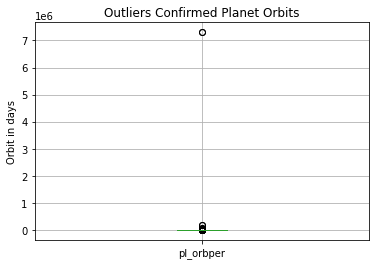

In [102]:
#Show a boxplot of the confrimed planets' orbits
df9.boxplot()
#Create a title for the plot
plt.title('Outliers Confirmed Planet Orbits')
#Create the y_label
plt.ylabel('Orbit in days')

We will just be removing outliers by using the number of days the Kepler Space telscope has been operatinal as a cut off.

Keplers Operatinal time = 4309 days at the time of my writng this.

This will ensure that any planet with a longer orbital period than Keplers operatinal time will not be included. This is the simples and most effective way to remove outliers.

In [103]:
#Show the maximum value of the confirmed planets' orbits
df9.max()

pl_orbper    7300000.0
dtype: float64

In [104]:
#Remove the maximum value of the confirmed planets orbit
df10 = df9[df9.pl_orbper <= 4309.0]
#Show the results
df10

,pl_orbper
0,410.100010
1,110.900000
2,71.484000
3,14.479000
4,3.092514
...,...
7265,1.432475
7266,1.689868
7267,3.979100
7268,3.677240


We have the same problem with our Kepler objects of interest data. We will need to drop the most extreme outliers before proceeding.

Text(0, 0.5, 'Orbit in days')

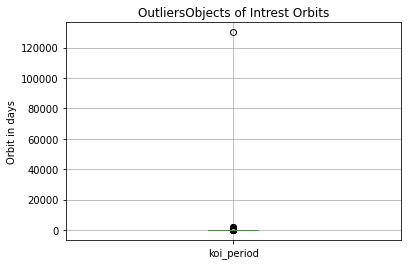

In [105]:
#Show a boxplot of the Kepler Object of Intrest orbits
df5.boxplot()
#Create a title for the plot
plt.title('OutliersObjects of Intrest Orbits')
#Create the y_label
plt.ylabel('Orbit in days')

In [106]:
#Show the maximum value of the Kepler Object of Intrest orbits
df5.max()

koi_period    129995.7784
dtype: float64

In [107]:
#Remove the maximum value of the Kepler Object of Intrest orbit
df5 = df5[df5.koi_period <= 4309.0]
#Show the results
df5

,koi_period
0,19.899140
1,1.736952
2,7.361790
3,11.521446
4,19.403938
...,...
7266,8.589871
7267,0.527699
7268,1.739849
7269,0.681402


We have a new problem now. The Kepler confirmed planets dataframe has lost a few dozen of its values, while the objects of interest dataframe has only lost one. This means our dataframes are no longer the same length. This will present problems for our linear regression. So we will be removing a some values from the Keplar objects of the interest dataframe to ensure that both dataframes have the same length.

In [108]:
#Remove 1 value from the Kepler Object of Intrest orbits
df5 = df5.iloc[117:]
#Show the results
df5

,koi_period
118,8.667822
119,6.721078
120,10.265477
121,13.447179
122,3.305578
...,...
7266,8.589871
7267,0.527699
7268,1.739849
7269,0.681402


Turn both our data frames into arrays and being the process of making our linear regression.

In [109]:
#Convert Kepler Confirmed Planets orbital data into an array
df10_array=df10.to_numpy()

In [110]:
#Convert Kepler Object of Intrest orbital data into an array
df5_array=df5.to_numpy()

Create a train test split of the data. Save LinearRegression as model. Reshape our x_train and X_test data, fit the training data to our linear regression, create y_pred for both the training and the test data. Then plot the results.

In [111]:
#Create a train test split of the orbital data
x_train,x_test,y_train,y_test = train_test_split(df5_array, df10_array, random_state=1)

In [112]:
#Create the variable model for the orbital data and make it a logistic Linear Regression model
model = LinearRegression()


In [113]:
#Reshape the X variables training data
x_train=x_train.reshape(-1,1)
#Reshape the X variables test data
x_test=x_test.reshape(-1,1)


In [114]:
#Fit the training data to the Linear Regression
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
#Create y_pred for the training data
y_pred_train=model.predict(x_train)
#Create y_pred for the test data
y_pred_test=model.predict(x_test)

This looks wrong at a glance. A regression line should not look like this. This means there is no linear relationship between the two sets of orbital data.


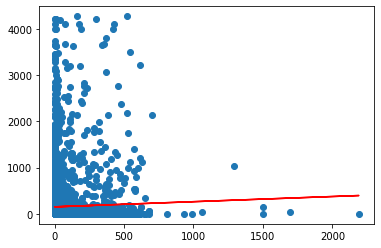

In [116]:
#Show the results as a linear regression scatter plot
plt.scatter(x_train,y_train)
#Make sure the color of our line is red
plt.plot(x_train,y_pred_train, color='red')

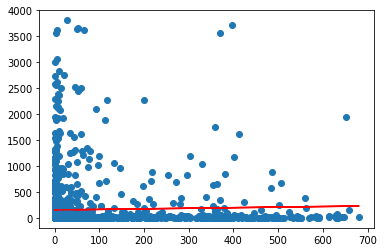

In [117]:
#Show the results as a linear regression scatter plot
plt.scatter(x_test,y_test)
#Make sure the color of our line is red
plt.plot(x_test,y_pred_test, color='red')

Confirm the results of the linear regression by using the pearson correlation coefficient.

In [118]:
#Join df5 and df10 so that we have all the orbital data in the same dataframe
df16=df5.join(df10)
#Show the results
df16


,koi_period,pl_orbper
118,8.667822,100.283134
119,6.721078,14.435889
120,10.265477,29.393195
121,13.447179,48.630408
122,3.305578,15.090000
...,...,...
7266,8.589871,1.689868
7267,0.527699,3.979100
7268,1.739849,3.677240
7269,0.681402,NaN


In [119]:
#Show the correlation
df16.corr(method ='pearson') 

,koi_period,pl_orbper
koi_period,1.000000,0.009355
pl_orbper,0.009355,1.000000


**Conclusion:**

Answer 1: We have confirmed that the mean mass of the Kepler Confirmed Planets is 4.371368, and the mass of the smallest Keplar Confirmed planet is 0.000060 Jupiter mass units. Which is roughly 30% more massive than Earth's moon at 0.000039 Jupiter mass units. We saw with the Swarmplot and Box Plot earlier that the mass of our solar system bodies does fall within the mass range that is detectable by Kepler. However, there is a disproportionate number of larger planets and when compared to our solar system we see that most of the planets found have a larger mass than the mass of our solar system's most massive planet, Jupiter.

Answer 2: After comparing the orbital periods of the Confirmed planets table and the Kepler objects of interest table with a linear regression we see that there is next to no linear relationship between the two sets of orbital data.

Additional Insights: We also saw that most of the planets and non-confirmed planets that Kepler detected have orbital periods well under a 1000 days. This is a reasonable result as the Kepler space telescope at the time of my writing this has been operational for 4309 days. Since then it has undergone repairs, had its orientation changed, as well as dealing with many other factors. Besides, Nasa needs evidence of multiple transits to conclude that an object is, in-fact, orbiting its host star and at what speed. As such, it is not unreasonable that most of our data points come from objects orbiting their planets more frequently.